In [1]:
import sklearn as sk
import numpy as np
from zipfile import ZipFile

In [2]:
file = ZipFile('orl_faces.zip')
file.extractall()
file.close()

In [3]:
from matplotlib import pyplot as py 
folder = 1
file = 1
data = []
for i in range(1,41):
    for j in range(1,11):
        data.append(py.imread("orl_faces/"+"s" + str(i) + "/"+str(j)+".pgm"))

        
print(data)

[array([[48, 49, 45, ..., 56, 56, 54],
       [45, 52, 39, ..., 52, 50, 51],
       [45, 50, 42, ..., 48, 53, 50],
       ...,
       [50, 48, 50, ..., 45, 46, 46],
       [45, 54, 49, ..., 46, 47, 47],
       [51, 51, 51, ..., 47, 46, 46]], dtype=uint8), array([[ 60,  60,  62, ...,  40,  53,  46],
       [ 58,  73,  54, ...,  34,  50,  51],
       [ 68,  77,  80, ...,  36,  50,  49],
       ...,
       [ 24, 143, 160, ...,  34,  33,  33],
       [ 18, 136, 161, ...,  36,  36,  31],
       [  9, 111, 168, ...,  32,  34,  34]], dtype=uint8), array([[39, 44, 53, ..., 47, 48, 47],
       [44, 44, 61, ..., 47, 45, 46],
       [59, 39, 57, ..., 46, 46, 44],
       ...,
       [49, 46, 42, ..., 30, 32, 28],
       [46, 35, 34, ..., 30, 29, 27],
       [32, 37, 27, ..., 29, 26, 29]], dtype=uint8), array([[63, 53, 35, ..., 36, 44, 45],
       [56, 48, 31, ..., 57, 50, 50],
       [52, 29, 35, ..., 54, 55, 61],
       ...,
       [35, 37, 36, ..., 44,  9, 25],
       [36, 35, 37, ..., 40,  7, 2

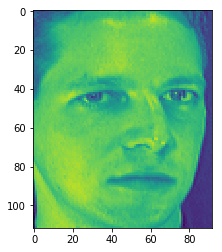

In [4]:
from matplotlib import image as mpimg
img = data[1]
imgplot = py.imshow(img)
py.show()

In [5]:
for i in range(0,400):
    data[i] = data[i].reshape(10304)
    
print(data)

[array([48, 49, 45, ..., 47, 46, 46], dtype=uint8), array([60, 60, 62, ..., 32, 34, 34], dtype=uint8), array([39, 44, 53, ..., 29, 26, 29], dtype=uint8), array([63, 53, 35, ..., 41, 10, 24], dtype=uint8), array([64, 76, 80, ..., 35, 37, 39], dtype=uint8), array([ 43,  50,  41, ..., 158, 153, 169], dtype=uint8), array([41, 47, 47, ..., 35, 37, 38], dtype=uint8), array([44, 43, 32, ..., 43, 43, 37], dtype=uint8), array([42, 41, 44, ..., 42, 43, 41], dtype=uint8), array([34, 34, 33, ..., 37, 40, 33], dtype=uint8), array([ 35,  36,  37, ..., 144, 147, 143], dtype=uint8), array([37, 35, 35, ..., 26, 28, 28], dtype=uint8), array([30, 37, 35, ..., 26, 27, 32], dtype=uint8), array([34, 36, 35, ..., 32, 25, 25], dtype=uint8), array([35, 32, 36, ..., 25, 28, 29], dtype=uint8), array([34, 35, 35, ..., 31, 24, 24], dtype=uint8), array([ 38,  35,  36, ..., 138, 142, 141], dtype=uint8), array([ 34,  39,  35, ..., 135, 138, 148], dtype=uint8), array([ 43,  39,  36, ..., 154, 155, 141], dtype=uint8), 

In [6]:
df = np.array(data)
print(df)

print(df.shape)

[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]
(400, 10304)


In [7]:
labels = []
for i in range(1,41):
    for j in range(1,11):
        labels.append(i)
        
# print(labels)

In [8]:
# list(range(1,400,2))


In [9]:
train_vectors = np.array(df)[list(range(0,400,2)),:]
train_labels = np.array(labels)[list(range(0,400,2))]

test_vectors = np.array(df)[list(range(1,400,2)),:]
test_labels = np.array(labels)[list(range(1,400,2))]




In [ ]:
# train_vectors_70=[]
# test_vectors_70=[]
# train_labels_70=[]
# test_labels_70=[]
# count=-10
# for i in range(0,40):
#     count=count+10
#     for j in range(0,10):
#         if j<7:
#             train_vectors_70.append(df[count+j])
#             train_labels_70.append(labels[i])
#         else:
#             test_vectors_70.append(df[count+j])
#             test_labels_70.append(labels[i])


            
            


# PCA

In [10]:
# mean vector
train_mean = np.mean(train_vectors,axis =0)
print(np.array([train_mean]).T)

[[86.115]
 [86.265]
 [86.685]
 ...
 [76.5  ]
 [77.395]
 [77.085]]


In [11]:
# cenetered Data matrix
z = train_vectors - train_mean
print(z)

[[-38.115 -37.265 -41.685 ... -29.5   -31.395 -31.085]
 [-47.115 -42.265 -33.685 ... -47.5   -51.395 -48.085]
 [-22.115 -10.265  -6.685 ... -41.5   -40.395 -38.085]
 ...
 [ 41.885  38.735  38.315 ...   8.5    12.605   6.915]
 [ 42.885  40.735  46.315 ...  16.5    15.605  15.915]
 [ 32.885  33.735  33.315 ...  12.5    16.605   7.915]]


In [12]:
# covariance matrix 
train_cov = np.cov(z,rowvar = 0, bias = 1 ,  ddof = 0)
print(train_cov)

[[1241.511775 1237.489525 1220.456225 ...  -69.8075    -99.755425
   -43.884775]
 [1237.489525 1250.244775 1227.058475 ...  -81.5325   -110.499675
   -55.222525]
 [1220.456225 1227.058475 1222.145775 ...  -79.0825   -114.060575
   -67.653225]
 ...
 [ -69.8075    -81.5325    -79.0825   ... 1894.       1865.0575
  1682.5425  ]
 [ -99.755425 -110.499675 -114.060575 ... 1865.0575   1970.238975
  1809.101425]
 [ -43.884775  -55.222525  -67.653225 ... 1682.5425   1809.101425
  1888.737775]]


In [13]:
# # eigenvalues & eigenvectors

eigenvalues_PCA , eigenvectors_PCA = np.linalg.eigh(train_cov)

eigenvalues_PCA = np.diag(eigenvalues_PCA)
print(eigenvalues_PCA)
print(eigenvectors_PCA)


[[-1.37546973e-09  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.27030654e-09  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.12620957e-10 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.14824189e+06
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   2.01725036e+06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  2.89336806e+06]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.05577118e-02
   1.36115565e-02 -2.81623260e-03]
 [ 5.40468467e-01  4.24448830e-01  8.26282535e-02 ...  2.05184388e-02
   1.37237246e-02 -2.78538278e-03]
 [-3.52591924e-01  1.56166320e-01  5.79027470e-01 ...  2.03021295e-02
   1.37554242e-02 -2.55134713e-03]
 ...
 [-7.69232644e-04  7.26610983e-03 -5.5618381

In [14]:
alpha=0.85
sum_eigenvalues=0
count=0
print(len(eigenvalues_PCA))
for i in range (len(eigenvalues_PCA)-1,0,-1): 
#         print(sum_eigenvalues)
        count=count+1
        sum_eigenvalues = sum_eigenvalues + eigenvalues_PCA[i][i] 
        if sum_eigenvalues/np.sum(eigenvalues_PCA)>alpha:
            break
            
            
print(sum_eigenvalues/np.sum(eigenvalues_PCA))
print(count)

10304
0.8506468639580903
51


In [15]:
# temp=i
# for j in range (len(eigenvalues)-1,i-1,-1):
#      print(eigenvectors[j])
    
    
projection_matrix = eigenvectors_PCA[:,len(eigenvalues_PCA)-count:]
print(projection_matrix)
print(projection_matrix.shape)
# x=projection_matrix[:,1].reshape(112,92)
# imgplot = py.imshow(x)
# py.show()

[[ 0.00042686  0.00488859 -0.00635318 ...  0.02055771  0.01361156
  -0.00281623]
 [ 0.00195722  0.00319341 -0.0044173  ...  0.02051844  0.01372372
  -0.00278538]
 [ 0.00041588  0.00357969 -0.00420832 ...  0.02030213  0.01375542
  -0.00255135]
 ...
 [-0.00533722  0.00541942  0.01453131 ...  0.01558413 -0.01151936
  -0.0054346 ]
 [-0.00461872  0.00152279  0.01284369 ...  0.01481205 -0.01183526
  -0.00555782]
 [-0.00194064  0.00343359  0.00929953 ...  0.0152495  -0.01087738
  -0.00628804]]
(10304, 51)


In [16]:
reduced_dim_trainvectors_2=np.dot(train_vectors,projection_matrix)
print(reduced_dim_trainvectors_2.shape)

(200, 51)


In [17]:
reduced_dim_testvectors_2=np.dot(test_vectors,projection_matrix)
print(reduced_dim_testvectors_2.shape)


(200, 51)


In [18]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

classifier = KNeighborsClassifier()
params = {'n_neighbors': [1,3,5,7], 'weights':['uniform', 'distance']}
classifier = GridSearchCV(classifier, params, cv=3, n_jobs=4)
classifier.fit(reduced_dim_trainvectors_2, train_labels)
classifier = classifier.best_estimator_

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_2))
print("Training Accuracy:", accuracy)
test_predictions = classifier.predict(reduced_dim_testvectors_2)
accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", accuracy)



Training Accuracy: 1.0
Test Accuracy: 0.95


C:\Users\Saleh\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
# LDA
class_means=[]
class_vectors=[]

for i in range(0,40):
        class_vectors.append(np.array(train_vectors)[5*i:5+5*i,:])
        class_means.append(np.mean(class_vectors[i],axis=0))
        print(class_means[i])

        
class_means=np.asarray(class_means)
print(class_means.shape)

[46.8 51.4 53.8 ... 37.6 37.8 38.6]
[36.2 35.8 36.  ... 97.4 99.8 97.2]
[103.6 107.  104.4 ...  47.2  49.6  47. ]
[115.8 117.6 118.4 ...  63.4  63.8  64.2]
[129.8 129.2 128.2 ...  65.8  63.8  68.6]
[149.2 149.2 149.  ...  98.2  97.8  97.4]
[53.8 52.8 53.2 ... 64.6 62.6 62.2]
[120.4 120.4 121.4 ...  64.2  67.2  66.6]
[106.8 107.4 110.6 ...  85.4  78.4  84.2]
[136.  135.6 136.  ...  26.8  33.6  41.8]
[49.6 47.  47.  ... 31.  31.6 35.8]
[107.2 105.8 106.6 ...  39.6  37.6  39.4]
[109.  109.6 108.2 ...  30.   33.   32.6]
[ 46.6  44.8  48.  ... 151.4 142.8 114.6]
[86.6 87.8 88.4 ... 60.  59.4 61. ]
[59.  58.6 58.6 ... 64.4 70.  63.4]
[51.6 52.4 54.2 ... 43.4 43.  45.4]
[119.8 119.4 120.6 ...  74.6  75.2  74. ]
[49.  49.4 50.8 ... 35.2 36.4 37.2]
[109.  109.4 111.2 ...  42.   43.4  41. ]
[100.6 101.6 101.4 ... 138.2 152.6 155.2]
[ 53.6  57.6  54.4 ... 109.8 125.8 132.4]
[120.  122.  119.6 ...  73.   70.2  73.4]
[36.2 38.4 39.6 ... 50.8 50.8 50.4]
[120.4 122.  121.  ...  89.2  93.2  98.6]
[110

In [ ]:
# class_means=[]
# class_vectors=[]

# for i in range(0,40):
#         class_vectors.append(np.array(train_vectors_70)[7*i:7+7*i,:])
#         class_means.append(np.mean(class_vectors[i],axis=0))
#         print(class_means[i])

        
# class_means=np.asarray(class_means)
# print(class_means.shape)

In [20]:
summation_class=np.zeros([10304,10304],float)
for i in range(0,40):
   
    summation_class=np.add(summation_class,(5*(np.outer((class_means[i]-train_mean),(class_means[i]-train_mean)))))
    
print(summation_class)
    


[[221513.555 220621.705 218488.645 ... -16726.5   -21288.885 -10780.955]
 [220621.705 220582.155 218178.495 ... -18392.1   -22588.335 -11850.305]
 [218488.645 218178.495 216305.155 ... -18975.3   -23655.315 -13299.645]
 ...
 [-16726.5   -18392.1   -18975.3   ... 298757.2   305832.7   291714.1  ]
 [-21288.885 -22588.335 -23655.315 ... 305832.7   318949.395 305942.485]
 [-10780.955 -11850.305 -13299.645 ... 291714.1   305942.485 300057.155]]


In [ ]:
# summation_class=np.zeros([10304,10304],float)
# for i in range(0,40):
   
#     summation_class=np.add(summation_class,(7*(np.outer((class_means[i]-train_mean),(class_means[i]-train_mean)))))
    
# print(summation_class)
    

In [21]:
scatter_matrix=np.zeros([10304,10304],float)
for i in range(0,40):
    
    scatter_matrix=np.add(scatter_matrix,(np.dot((class_vectors[i]-class_means[i]).T,class_vectors[i]-class_means[i])))

# print(scatter_matrix.shape)    
print(scatter_matrix)

[[26788.8 26876.2 25602.6 ...  2765.   1337.8  2004. ]
 [26876.2 29466.8 27233.2 ...  2085.6   488.4   805.8]
 [25602.6 27233.2 28124.  ...  3158.8   843.2  -231. ]
 ...
 [ 2765.   2085.6  3158.8 ... 80042.8 67178.8 44794.4]
 [ 1337.8   488.4   843.2 ... 67178.8 75098.4 55877.8]
 [ 2004.    805.8  -231.  ... 44794.4 55877.8 77690.4]]


In [22]:
dominant_vectors_LDA=np.dot(np.linalg.pinv(scatter_matrix),summation_class)
print(dominant_vectors_LDA)

[[ 8.40489964e+08  8.97262519e+08  9.45682613e+08 ... -3.90630676e+09
  -4.00570627e+09 -4.00425491e+09]
 [ 2.43144513e+11  2.40913597e+11  2.36643960e+11 ...  1.53880134e+11
   1.53975595e+11  1.65715659e+11]
 [-5.70164359e+11 -5.72803319e+11 -5.70502270e+11 ...  1.80847866e+11
   1.92796101e+11  1.70042104e+11]
 ...
 [-6.11793379e+07 -5.56334016e+07 -4.96753727e+07 ... -3.81791803e+08
  -3.89524858e+08 -3.95503674e+08]
 [ 1.41576168e+08  1.40942434e+08  1.39108147e+08 ...  4.38120704e+07
   4.28387735e+07  4.92709758e+07]
 [-5.53996237e+07 -5.71143269e+07 -5.83195228e+07 ...  1.17941099e+08
   1.21357390e+08  1.20031451e+08]]


In [23]:
eigenvalues_LDA,eigenvectors_LDA =np.linalg.eig(dominant_vectors_LDA)

print(eigenvalues_LDA)
print(eigenvectors_LDA)


[ 1.70866837e+11+0.00000000e+00j -9.13482933e+10+0.00000000e+00j
  1.39624956e+01+0.00000000e+00j ...  4.50477023e-08+1.01257521e-07j
  4.50477023e-08-1.01257521e-07j  9.66881762e-08+0.00000000e+00j]
[[ 1.36358047e-03+0.j         -3.54611938e-03+0.j
  -2.05505528e-03+0.j         ...  8.41822987e-03-0.00253566j
   8.41822987e-03+0.00253566j  5.08748013e-03+0.j        ]
 [-4.80647295e-01+0.j         -2.64412630e-01+0.j
  -3.34756580e-01+0.j         ...  2.69513936e-03-0.00302454j
   2.69513936e-03+0.00302454j  8.77579141e-05+0.j        ]
 [ 7.57887618e-01+0.j          9.41289078e-01+0.j
   8.98890463e-01+0.j         ... -5.07691998e-03+0.00277517j
  -5.07691998e-03-0.00277517j  8.10830363e-03+0.j        ]
 ...
 [ 3.54774480e-04+0.j         -1.36929972e-04+0.j
   1.00916169e-04+0.j         ...  7.56703385e-03+0.00682156j
   7.56703385e-03-0.00682156j -3.64788965e-04+0.j        ]
 [-2.48658649e-04+0.j         -1.81114729e-04+0.j
  -2.89590639e-04+0.j         ... -4.23132415e-03+0.00123076j

In [24]:
sort_perm = eigenvalues_LDA.argsort()

eigenvalues_LDA.sort()  
eigenvectors_LDA2 = eigenvectors_LDA[:, sort_perm]
eigenvectors_LDA2 = eigenvectors_LDA2[:, len(eigenvalues_LDA)-39:]

# print(eigenvalues_LDA)
# print(eigenvectors_LDA)

In [25]:
print(eigenvalues_LDA.shape)
# print(eigenvalues_LDA)

(10304,)


In [26]:
print(eigenvectors_LDA2.shape)
# print(eigenvectors_LDA)
# print(eigenvectors_LDA2)

(10304, 39)


In [27]:
eigenvectors_LDA_real=np.real(eigenvectors_LDA2)

# projection_matrix_LDA = eigenvectors_LDA_real[:,len(eigenvalues_LDA)-count:]
# print(projection_matrix_LDA)
# print(projection_matrix_LDA.shape)

In [28]:
# eigenvectors_LDA_real=np.real(eigenvectors_LDA)
reduced_dim_trainvectors_LDA=np.dot(train_vectors,eigenvectors_LDA_real)
# reduced_dim_trainvectors_LDA=np.dot(train_vectors,projection_matrix_LDA)

print(reduced_dim_trainvectors_LDA.shape)


(200, 39)


In [29]:
reduced_dim_testvectors_LDA=np.dot(test_vectors,eigenvectors_LDA_real)
# reduced_dim_testvectors_LDA=np.dot(test_vectors,projection_matrix_LDA)

print(reduced_dim_testvectors_LDA.shape)


(200, 39)


In [30]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

classifier = KNeighborsClassifier()
params = {'n_neighbors': [1,3,5,7], 'weights':['uniform', 'distance']}
classifier = GridSearchCV(classifier, params, cv=3, n_jobs=4)
classifier.fit(reduced_dim_trainvectors_LDA, train_labels)
classifier = classifier.best_estimator_

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_LDA))
print("Training Accuracy:", accuracy)
test_predictions_LDA = classifier.predict(reduced_dim_testvectors_LDA)
accuracy = accuracy_score(test_labels, test_predictions_LDA)
print("Test Accuracy:", accuracy)



C:\Users\Saleh\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training Accuracy: 1.0
Test Accuracy: 0.475


In [39]:
# Tunning KNN PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(reduced_dim_trainvectors_2, train_labels)

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_2))
print("Training Accuracy:", accuracy)
test_predictions = classifier.predict(reduced_dim_testvectors_2)
accuracy_KNN_T1 = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", accuracy_KNN_T1)



Training Accuracy: 1.0
Test Accuracy: 0.95


In [40]:
# Tunning KNN PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(reduced_dim_trainvectors_2, train_labels)

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_2))
print("Training Accuracy:", accuracy)
test_predictions = classifier.predict(reduced_dim_testvectors_2)
accuracy_KNN_T3 = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", accuracy_KNN_T3)



Training Accuracy: 0.97
Test Accuracy: 0.895


In [41]:
# Tunning KNN PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(reduced_dim_trainvectors_2, train_labels)

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_2))
print("Training Accuracy:", accuracy)
test_predictions = classifier.predict(reduced_dim_testvectors_2)
accuracy_KNN_T5 = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", accuracy_KNN_T5)



Training Accuracy: 0.91
Test Accuracy: 0.845


In [42]:
# Tunning KNN PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(reduced_dim_trainvectors_2, train_labels)

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_2))
print("Training Accuracy:", accuracy)
test_predictions = classifier.predict(reduced_dim_testvectors_2)
accuracy_KNN_T7 = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", accuracy_KNN_T7)



Training Accuracy: 0.87
Test Accuracy: 0.775


In [43]:
# Tunning KNN LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(reduced_dim_trainvectors_LDA, train_labels)

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_LDA))
print("Training Accuracy:", accuracy)
test_predictions = classifier.predict(reduced_dim_testvectors_LDA)
accuracy_KNN_LT1 = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", accuracy_KNN_LT1)



Training Accuracy: 1.0
Test Accuracy: 0.465


In [44]:
# Tunning KNN LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(reduced_dim_trainvectors_LDA, train_labels)

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_LDA))
print("Training Accuracy:", accuracy)
test_predictions = classifier.predict(reduced_dim_testvectors_LDA)
accuracy_KNN_LT3 = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", accuracy_KNN_LT3)



Training Accuracy: 0.63
Test Accuracy: 0.39


In [45]:
# Tunning KNN LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(reduced_dim_trainvectors_LDA, train_labels)

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_LDA))
print("Training Accuracy:", accuracy)
test_predictions = classifier.predict(reduced_dim_testvectors_LDA)
accuracy_KNN_LT5 = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", accuracy_KNN_LT5)



Training Accuracy: 0.62
Test Accuracy: 0.37


In [47]:
# Tunning KNN LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(reduced_dim_trainvectors_LDA, train_labels)

accuracy = accuracy_score(train_labels, classifier.predict(reduced_dim_trainvectors_LDA))
print("Training Accuracy:", accuracy)
test_predictions = classifier.predict(reduced_dim_testvectors_LDA)
accuracy_KNN_LT7 = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", accuracy_KNN_LT7)



Training Accuracy: 0.595
Test Accuracy: 0.445


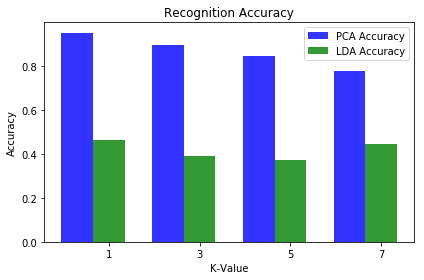

In [49]:
# data to plot
n_groups = 4
PCA_Accuracy = (accuracy_KNN_T1, accuracy_KNN_T3, accuracy_KNN_T5, accuracy_KNN_T7)
LDA_Accuracy = (accuracy_KNN_LT1, accuracy_KNN_LT3, accuracy_KNN_LT5, accuracy_KNN_LT7)
 
# create plot
fig, ax = py.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = py.bar(index, PCA_Accuracy, bar_width,
alpha=opacity,
color='b',
label='PCA Accuracy')
 
rects2 = py.bar(index + bar_width, LDA_Accuracy, bar_width,
alpha=opacity,
color='g',
label='LDA Accuracy')
 
py.xlabel('K-Value')
py.ylabel('Accuracy')
py.title('Recognition Accuracy')
py.xticks(index + bar_width, ('1', '3', '5', '7'))
py.legend()
 
py.tight_layout()
py.show()